In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Config')
from lablib import LS_fit

# Prima parte

## Circuito RC

Abbiamo effettuato le misurazioni con il cursore dell'oscilloscopio. \
**Resistenza interna oscilloscopio** = 50 $\Omega$

Intrvallo tensione (0.5,-0.5) V \
Capacità = 10 nF \
resistenza = 67.1 $k\Omega$ \
frequenza = 200 Hz \
incertezza su oscilloscopio (precisione strumento) = 8 mV


In [2]:
# Primo plot dei dati
dati1 = pd.read_csv("Dati1.csv")

tempi1 = dati1["tempo(carica)[µs]"]
tens1 = dati1["tensione(carica1)[mV]"]

# plt.errorbar(tempi1, tens1, [8 for i in tens1], fmt = '.')
# plt.show()

KeyError: 'tempo(carica)[µs]'

In [3]:
# prova fit dei dati con libreria
def mod_exp(x, A, T, C):
    return A*np.exp(-x/T) + C

tempi1_µs = [i*1e-6 for i in tempi1]
tens1_mv = [i*1e-3 for i in tens1]
tens1_err = [.008 for i in tens1]

par1, val1, ers1, pval1, *other = LS_fit(tempi1_µs, tens1_mv, tens1_err, mod_exp, disp=1, A=1, T=1, C=0) # type: ignore

for p, v, e in zip(par1, val1, ers1):
    print(f"{p} = {v:.3f} ± {e:.3f}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.716 (chi2/ndof = 0.2)    │              Nfcn = 153              │
│ EDM = 1.3e-07 (Goal: 0.0002)     │            time = 3.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.964   │   0.006   │            │            │         │         │       │
│ 1 │ T    │  65.2e-6  │  1.1e-6   │            │            │         │         │       │
│ 2 │ C    │  -0.002   │   0.005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         A         T         C │
├───┼───────────────────────────────┤
│ A │  3.92e-05  1.36e-10 -1.34e-05 │
│ T │  1.36e-10  1.21e-12 -4.24e-09 │
│ C │ -1.34e-05 -4.24e-09  2.25e-05 │
└───┴───────────────────────────────┘

A = 0.964 ± 0.006
T = 0.000 ± 0.000
C = -0.002 ± 0.005


In [4]:
QC, tau_1, c_0 = val1
R_1 = 67.1e3 # Ohm

C = tau_1/R_1
print(f"Capacità calcolata = {C:.3g}")

Capacità calcolata = 9.72e-10


## Circuito RL

induttanza circa 10 mH \
resistenza = 1 $k\Omega$ \
frequenza = 700 Hz \
range di tensione = -1,1 V \
precisione oscilloscopio = 20 mV

In [5]:
# plot dei dati

dati2 = pd.read_csv("Dati2.csv")
tempi2 = dati2["tempo"]
tens2 = dati2["tensione(carica1)"]

# plt.errorbar(tempi2, tens2, [20 for i in tens2])
# plt.show()

In [6]:
# Fit circuito RL

tempi2_ms = [i*1e-3 for i in tempi2]
tens2_mv = [i*1e-3 for i in tens2]
tens2_err = [.02 for i in tens2]

par2, val2, ers2, pval2, *other2 = LS_fit(tempi2_ms, tens2_mv, tens2_err, mod_exp, disp=1, A=1, T=1, C=1000)

for p, v, e in zip(par2, val2, ers2):
    print(f"{p} = {v:.3g} ± {e:.3g}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 43.38 (χ²/ndof = 3.3)      │              Nfcn = 239              │
│ EDM = 9.18e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │  -1.784   │   0.017   │            │            │         │         │       │
│ 1 │ T    │  46.7e-6  │  1.2e-6   │            │            │         │         │       │
│ 2 │ C    │   0.918   │   0.013   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────────────────┐
│   │          A          T          C │
├───┼──────────────────────────────────┤
│ A │   0.000304 -1.8679e-9   -0.11e-3 │
│ T │ -1.8679e-9   1.39e-12 13.1414e-9 │
│ C │   -0.11e-3 13.1414e-9   0.000178 │
└───┴──────────────────────────────────┘

A = -1.78 ± 0.0174
T = 4.67e-05 ± 1.18e-06
C = 0.918 ± 0.0133


In [7]:
Va, tau_2, c_1 = val2
R_2 = 1e3 # ohm

L = R_2 * tau_2
print(f"Induttanza misurata = {L:.3g}")

Induttanza misurata = 0.0467


 # Seconda parte

## Circuito RLC

Resistenza = 300 $\Omega$ \
Induttanza e capacità uguali a prima \
Intervallo tensione (1,0)

Abbiamo stimato le costanti del sistema prima di prendere i dati:
* $\omega_0$ = 100 kHz
* $f_0 = \frac{\omega_0}{2\pi}$ = 16kHz 

Ci siamo resi presto conto che questi risultati sono insensati \
Frequenza effettivamente usata = 300 Hz


Per smorzamento critico abbiamo usato Resistenza = 3900 $\Omega$ \
Per sovrasmorzamento abbiamo usato Resistenza = 10.000 $\Omega$

### Caso sottosmorzato

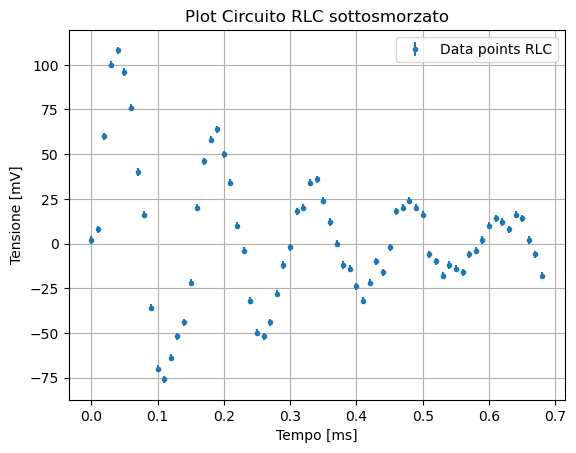

In [17]:
#plot dati RLC sottosmorzato

dati3 = pd.read_csv("Dati3.csv")
tempo3=dati3["tempo[ms]"]
tensione3=dati3["tensione[mV]"]

tempo3_ms = [i*1e-3 for i in tempo3]
tensione3_mv = [i*1e-3 for i in tensione3]

tens3_err = [.008 for i in tensione3]

plt.errorbar(tempo3_ms,tensione3_mv,tens3_err, fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC sottosmorzato")
plt.xlabel("Tempo [ms]")
plt.ylabel("Tensione [mV]")
plt.legend()
plt.grid()
plt.show()

In [22]:
# fit dei dati nel caso sottosmorzato

R_3 = R_1
C_3 = C
V_0 = 1
L_3 = L

K1 = R_3 * C_3 * V_0
omega_0_calc = 1/np.sqrt(L_3*C_3)
gamma_calc_1 = R_3/(2*L_3)
omega_calc_1 = np.sqrt(gamma_calc_1**2 + omega_0_calc**2)

def mod_ssm(x, gamma, omega):
    return K1 * np.exp(-gamma*x)*(gamma*np.cos(omega*x) + omega*np.sin(omega*x))

par3, val3, ers3, pval3, *other3 = LS_fit(tempo3_ms, tensione3_mv, tens3_err, mod_ssm, gamma = gamma_calc_1, omega = omega_calc_1)

C:\Users\i\AppData\Local\Temp\ipykernel_4636\3746445108.py:14: RuntimeWarning: overflow encountered in exp
  return K1 * np.exp(-gamma*x)*(gamma*np.cos(omega*x) + omega*np.sin(omega*x))
C:\Users\i\AppData\Local\Temp\ipykernel_4636\3746445108.py:14: RuntimeWarning: overflow encountered in multiply
  return K1 * np.exp(-gamma*x)*(gamma*np.cos(omega*x) + omega*np.sin(omega*x))
c:\Users\i\AppData\Local\Programs\Python\Python311\Lib\site-packages\iminuit\cost.py:130: RuntimeWarning: overflow encountered in multiply
  return z * z


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1520 (χ²/ndof = 22.7)      │              Nfcn = 339              │
│ EDM = 5.97e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ gamma │    1.6    │    2.3    │            │            │         │         │       │
│ 1 │ omega │942.477791e3│0.000006e3 │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────┐
│       │     gamma     omega │
├───────┼─────────────────────┤
│ gamma │      5.51 -11.54e-3 │
│ omega │ -11.54e-3     4e-05 │
└───────┴─────────────────────┘

### Caso Smorzamento Critico 

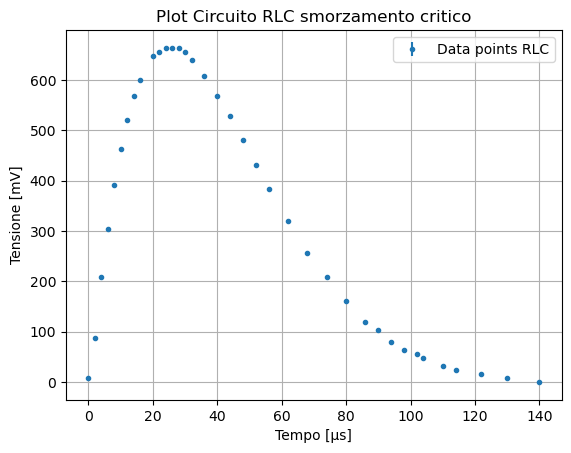

In [24]:
#plot dati RLC sottosmorzato
#resistenza usata R = 3900 omh

Dati3 = pd.read_csv("Dati3.csv")
tempo4 = Dati3["tempo2[µs]"]
tensione4 = Dati3["tensione2[mV]"]


plt.errorbar(tempo4,tensione4,[2 for i in tensione4], fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC smorzamento critico")
plt.xlabel("Tempo [µs]")
plt.ylabel("Tensione [mV]")
plt.legend()
plt.grid()
plt.show()

### Caso sovrasmorzato

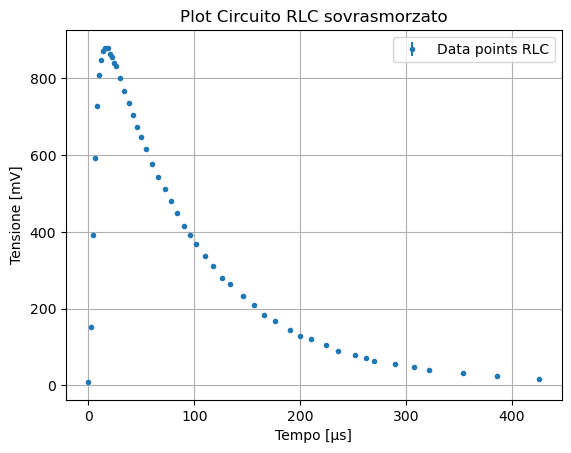

In [23]:
#plot dati RLC sovrasmorzato 
#resistenza utilizzato R= 10.000 ohm 

Dati5 = pd.read_csv("Dati3.csv")
tempo5= Dati5["tempo3[µs]"]
tensione5= Dati5["tensione3[mV]"]


plt.errorbar(tempo5,tensione5,[2 for i in tensione5], fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC sovrasmorzato")
plt.xlabel("Tempo [µs]")
plt.ylabel("Tensione [mV]")
plt.legend()
plt.grid()
plt.show()

